## Random Walk

Algoritmo para simular o random walk em 1 + 1 dimensões (posição x e tempo).

In [1]:
# dependencias
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Linear congruential generator
# fonte: https://pt.wikipedia.org/wiki/Geradores_congruentes_lineares

def set_seed(s=123456789):
    global seed
    seed = s

set_seed()

def lcg(m=2**32+1, a=1103515245, c=12345):
    global seed
    seed = (a*seed + c) % m
    return seed


In [3]:
# randomwalk parameters

walk_n = 10
step_n = 10000
step_set = [-1,1]
origin = 0

In [153]:
# Simulate walk in 1D
# fonte: https://github.com/edpeake/Random-Walk

def random_walk(step_n,step_set,origin):
    steps = np.zeros((step_n,), dtype=int)
    steps = np.insert(steps,0,origin,axis=0)
    for step in range(1,step_n+1):
        direction = lcg() % 2 
        steps[step] = steps[step-1] + step_set[direction]
        
    return steps
    

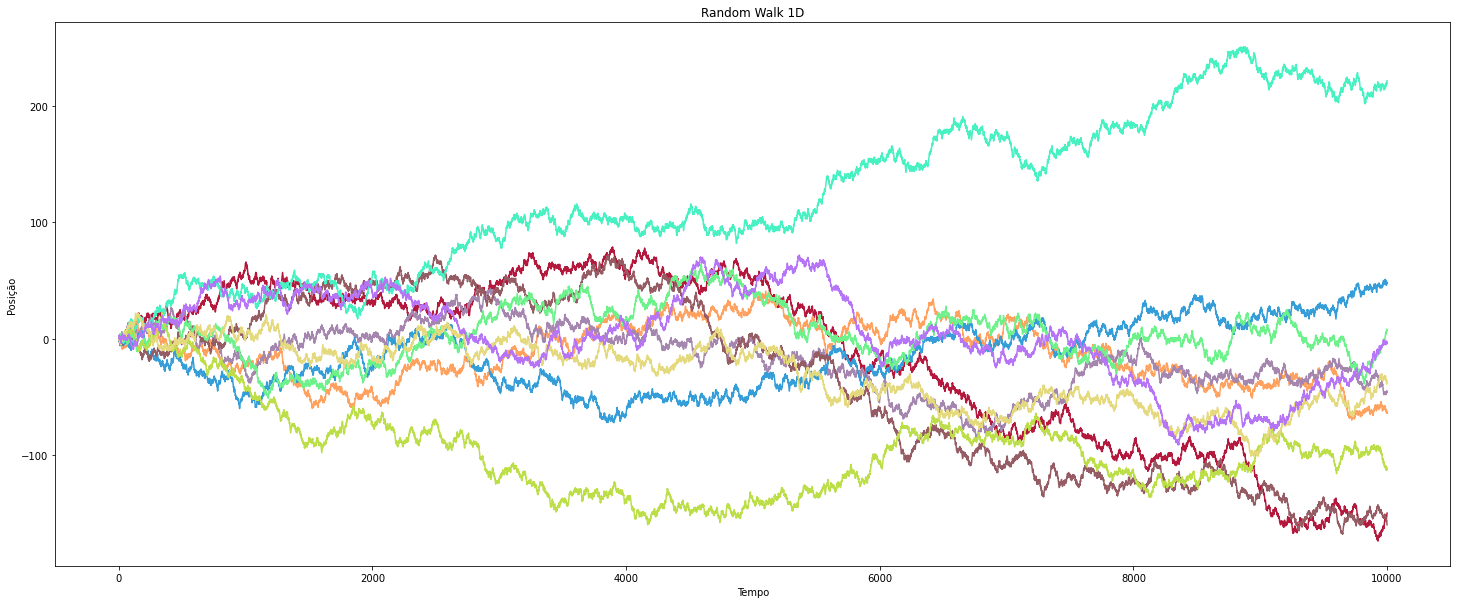

In [5]:
# plotting

walkers = np.zeros((walk_n,step_n+1))
for i in range(0,walk_n):
    walkers[i] = random_walk(step_n,step_set,origin)

plt.rcParams['figure.figsize'] = [25, 10]
plt.title("Random Walk 1D")
plt.xlabel("Tempo")
plt.ylabel("Posição")

for steps in walkers:
    plt.plot(np.arange(0, step_n+1), steps, color=numpy.random.rand(3,))

plt.show()

In [152]:
# desvio quadrático médio (Mean Square Displacement)
# fonte: https://www.youtube.com/watch?v=yZ7zHg7goBc

def msd(tau,path):
    if tau == 0: return 0
    
    displacement_sum = 0
    for t in range(0,len(path)-tau,tau):
        displacement_sum += (path[t+tau] - path[t])**2
    return displacement_sum/(len(path)/tau)



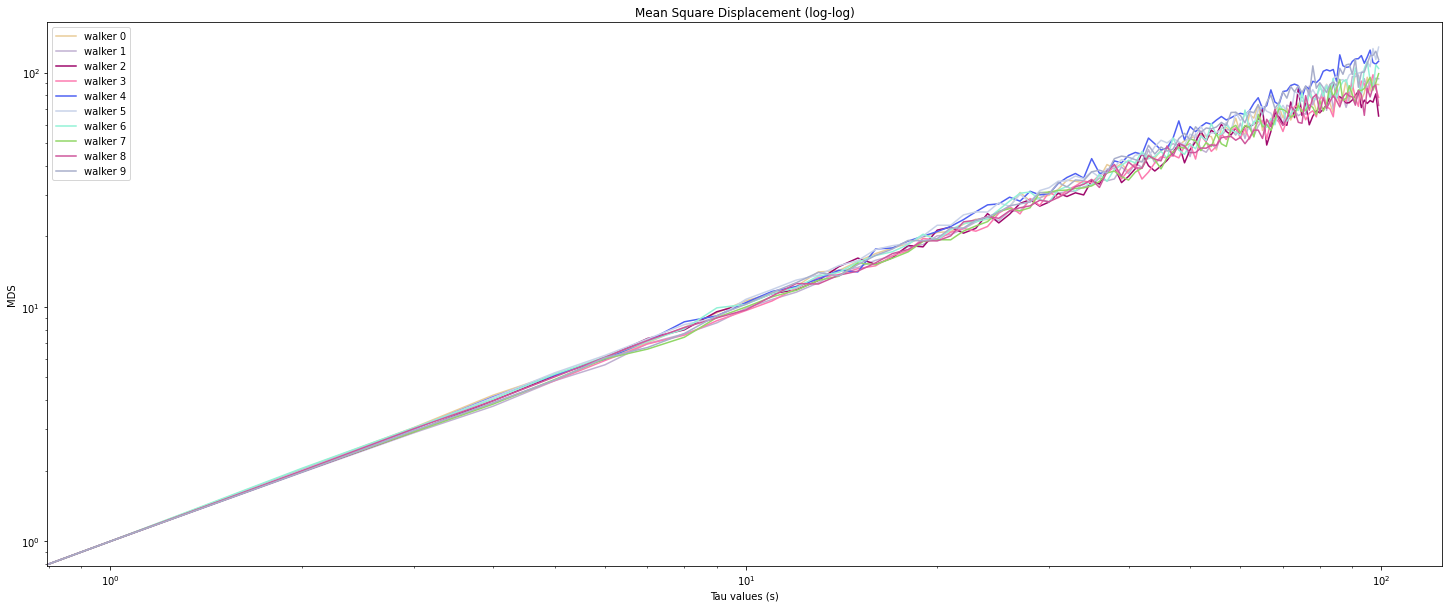

In [209]:
# mean square displacemant for all walkers, plotted with log-log scale.

tau_range = 100
msds = np.zeros((walk_n,tau_range), dtype=float)

for i in range(0,walk_n):
    for tau in range(0,tau_range):
        msds[i][tau] = msd(tau,walkers[i])
        
plt.rcParams['figure.figsize'] = [25, 10]
plt.title("Mean Square Displacement (log-log)")

plt.xlabel("Tau values (s)")
plt.xscale("log")
plt.ylabel("MDS")
plt.yscale("log")

for i in range(0,walk_n):
    plt.plot(np.arange(0, tau_range), msds[i], color=numpy.random.rand(3,), label=f"walker {i}")

plt.legend(loc="upper left")
plt.show()

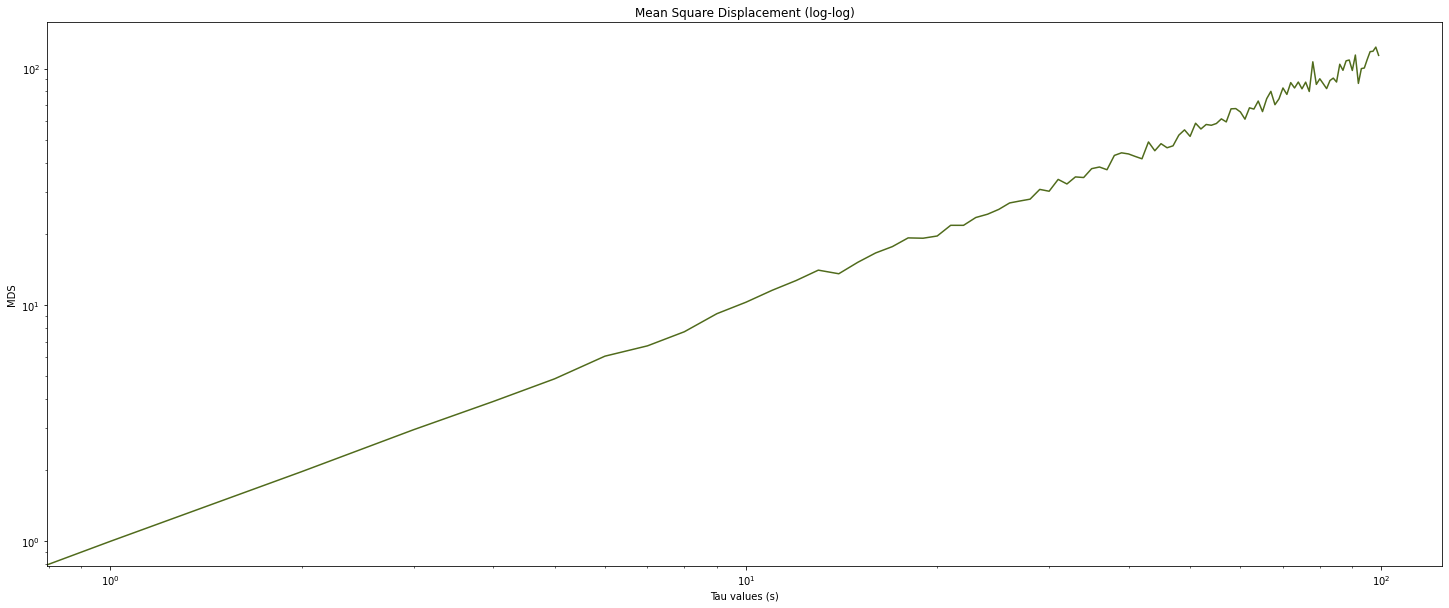

In [233]:
# mean value for all walkers

msd_mean = np.mean(msds, axis=0)

plt.rcParams['figure.figsize'] = [25, 10]
plt.title("Mean Square Displacement (log-log)")

plt.xlabel("Tau values (s)")
plt.xscale("log")
plt.ylabel("MDS")
plt.yscale("log")

plt.plot(np.arange(0, tau_range), msds[i], color=numpy.random.rand(3,))

plt.show()

In [237]:
# potency law curve fit
# fonte: https://ichi.pro/pt/ajuste-basico-de-curva-de-dados-cientificos-com-python-164454906602761

# Import curve fitting package from scipy
from scipy.optimize import curve_fit

# Function to calculate the power-law with constants a and b
def power_law(x, a, b):
    return a*np.power(x, b)

# fit function
pars, cov = curve_fit(f=power_law, xdata=np.arange(0, tau_range), ydata=msd_mean, p0=[1, 5])
print(f"a: {pars[0]}, b: {pars[1]}")
print(f"y = {pars[0]}*x^{pars[1]}")


a: 1.0632266820499991, b: 0.9836350285341431
y = 1.0632266820499991*x^0.9836350285341431


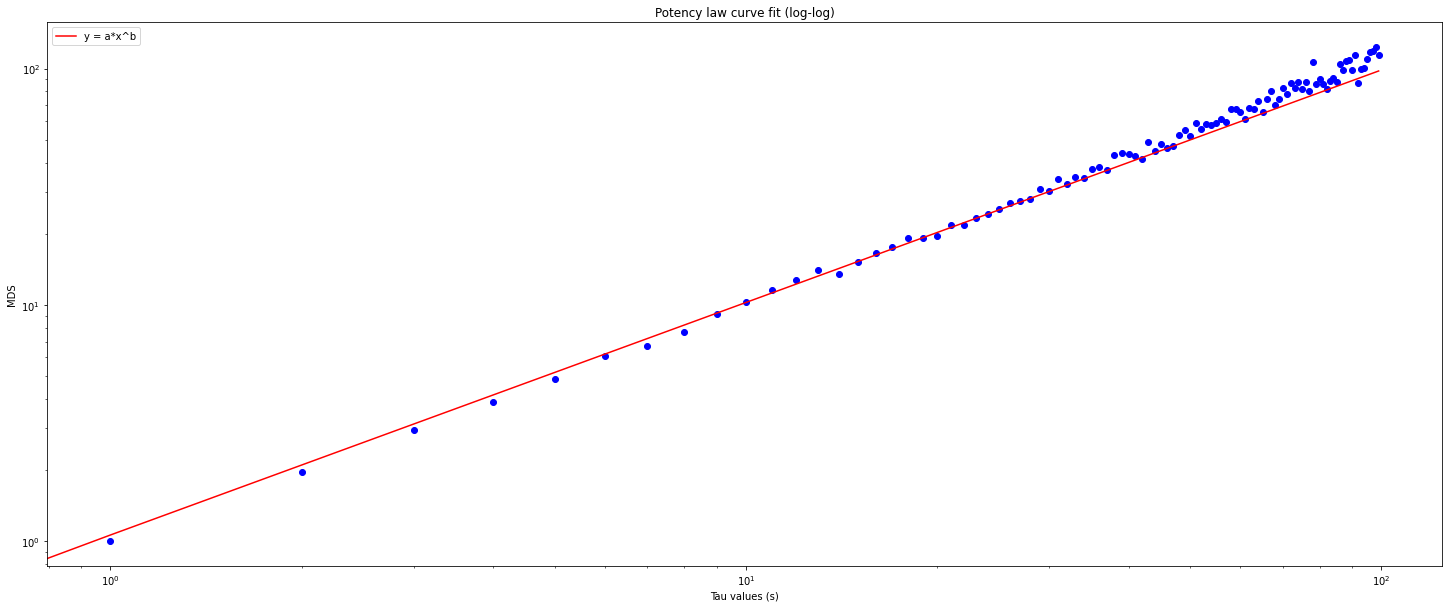

In [238]:
# plot data and fitted curve

plt.rcParams['figure.figsize'] = [25, 10]
plt.title("Potency law curve fit (log-log)")

plt.xlabel("Tau values (s)")
plt.xscale("log")
plt.ylabel("MDS")
plt.yscale("log")

x_data = np.arange(0, tau_range)
y_data = [power_law(x,pars[0],pars[1]) for x in x_data]

plt.scatter(np.arange(0, tau_range), msds[i], color='b')
plt.plot(x_data, y_data, color='r', label="y = a*x^b")

plt.legend(loc="upper left")
plt.show()

In [272]:
# Central Limit Theorem

new_walk_n = 1000

walkers = np.zeros((new_walk_n,step_n+1))
for i in range(0,new_walk_n):
    walkers[i] = random_walk(step_n,step_set,origin)

final_positions = walkers[:,step_n]

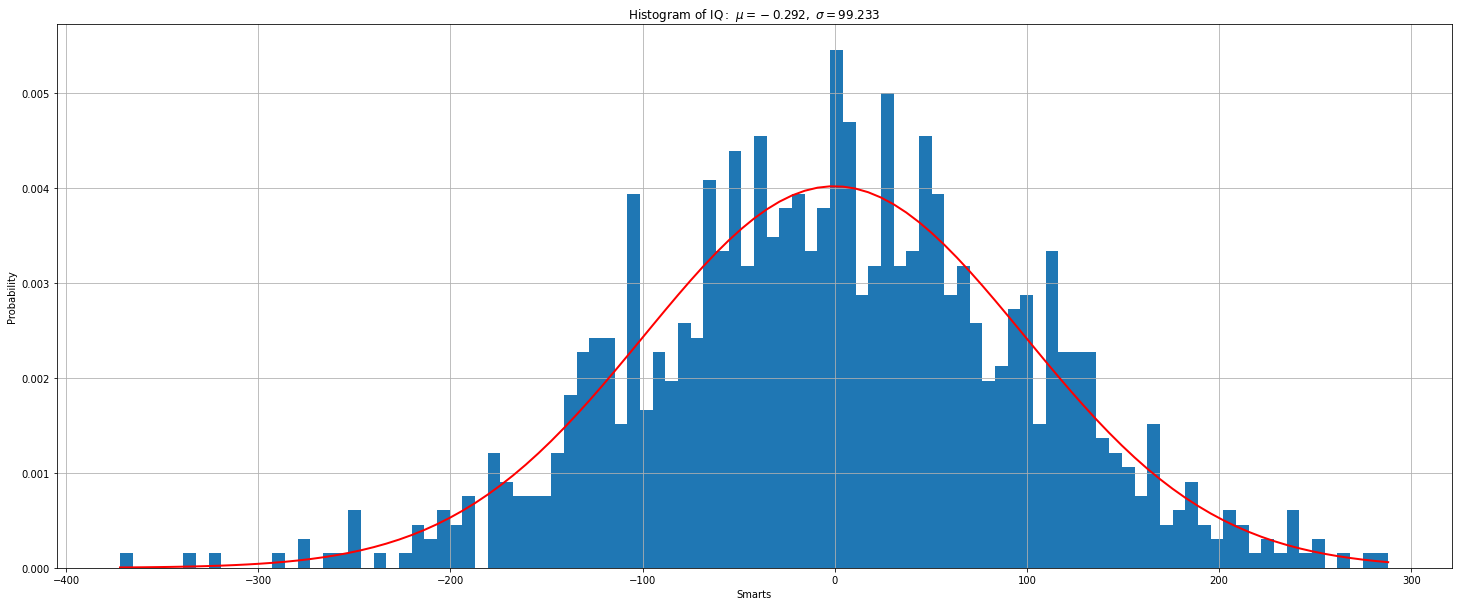

In [273]:
# plot distribution

from scipy.stats import norm

# fit gaussian
(mu, sigma) = norm.fit(final_positions)

# the histogram of the data
n, bins, patches = plt.hist(final_positions, 100, density=1)

# add a 'best fit' line
y = norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r', linewidth=2)

#plot
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
plt.grid(True)

plt.show()

Euler's identity: $ e^{i \pi} + 1 = 0 $